In [25]:
import torch
import cnn
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import get_data
import torch.nn.functional as F
import numpy as np
import shap

## Load model

In [26]:
model = cnn.ConvNet()
model.load_state_dict(torch.load("mnist_model.pt"))

<All keys matched successfully>

## Display an MNIST image

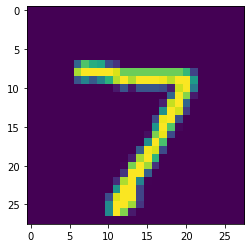

In [27]:
_, test_loader, _ = get_data.create_datasets(128)

for images, labels in test_loader:
    plt.imshow(images[0][0])
    break

## Show that the model works (it has >99% accuracy)

In [28]:
model.eval()
for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    break
print("Predicted: {}".format(predicted[0]))
print("Label: {}".format(labels[0]))

Predicted: 7
Label: 7


## Applying SHAP

In [29]:
background = images[:100]
test_images= images[100:110]

In [30]:
e = shap.DeepExplainer(model, images)
shap_values = e.shap_values(test_images)

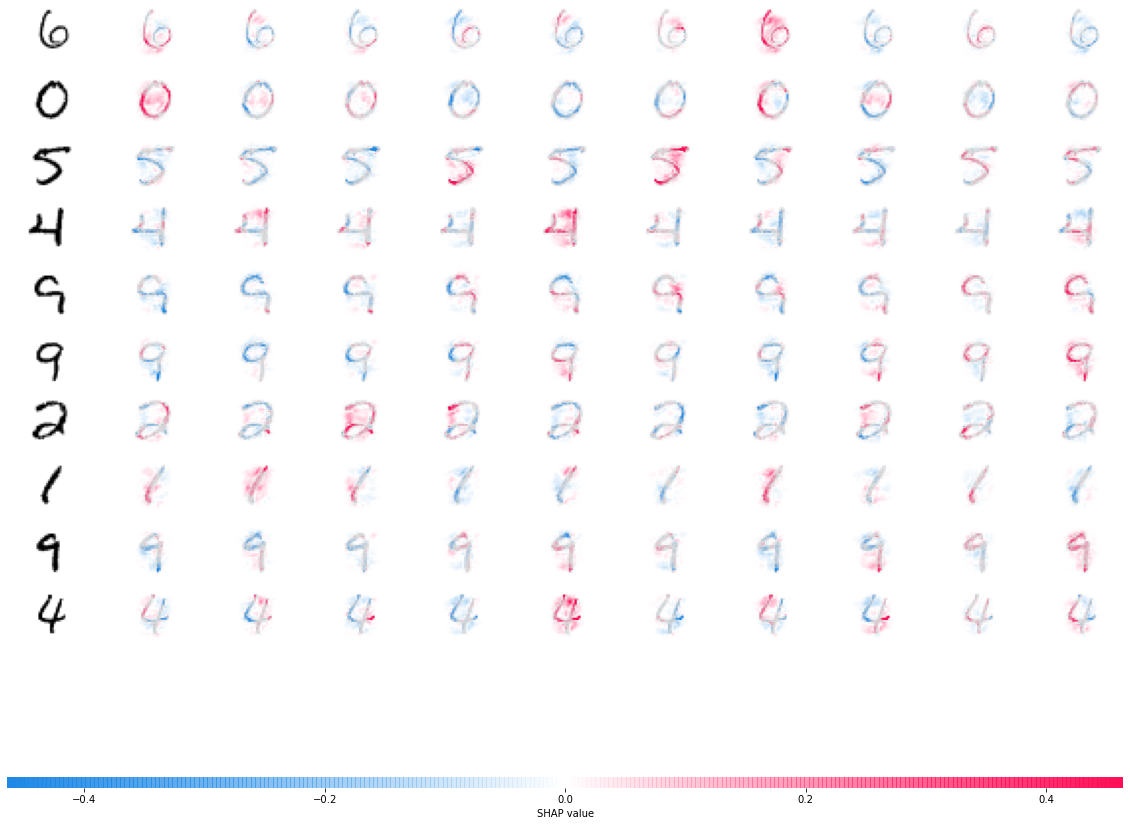

In [31]:
shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
test_numpy = np.swapaxes(np.swapaxes(test_images.numpy(), 1, -1), 1, 2)

shap.image_plot(shap_numpy, -test_numpy)